### 540 Final Project

#### Estimation of network reliability probability by Monte Carlo Simulation 

Network reliability is a provident filed by the development of the AI and the Internet, A signal sent from A to B in the network must follow a path along any available edges.

Impertinent network reliability means that the signal may fail to be transmitted correctly.







Method: Evaluate the probability of network faliure given specific probabilities for the failure of each egde.

Assupution: Consider the simplest case: each egde is assumed to fail independently with the same probability with P.

Generate the samples:$\vec{x}=\left(x_{1}, x_{2} \ldots x_{20}\right)$,where $x_{i}'s$ are independent Bernouli Distribution

$$b(\vec{x})=\text {number of broken edges in the network} $$

$$h(\vec{x})=\left\{\begin{array}{l}0, \text { if } A \text { and } B \text { are connected (working)} \\ 1, \text { if } A \text { and } B \text { are not connected (failure) }\end{array}\right.$$


Then, the probability of network failure is:


$$E[h(\vec{x})]=\mu$$


However, Calculating the $\mu$ of any network in realistic size can be a very difficult combinational probelm. 

So we introduced the `Monte Carlo simulation` to sovle the problem.

the first method is Monte Carlo Integration, and the second is Impotance sampling method


#### 1.1 Draw the network graph

#### Assuming that the network is `undirected`, each edge has the same `weight` and `capacity`.

Since we would like to study the network failure from the beginnin, we need these assuption, and the results did tell us we can have a lot work to do in the future.


In [1]:
import matplotlib.pyplot as plt 
import networkx as nx 

In [2]:
Gn = nx.Graph()

edges_list = [('A', '1'), ('A', '2'), ('A', '3'), ('A', '4'), ('1', '2'), ('1', '5'), ('1', '6'), ('2', '6'), ('2', '3'), ('3', '7'), ('3', '4'), ('4', '7'), ('4', '8'), ('5', '6'), ('5', 'B'), ('6', '7'), ('6', 'B'), ('7', '8'), ('7', 'B'), ('8', 'B')]

pos = {
        'A':(-2,0),
        '1':(-1,1.5),
        '2':(-1,0.5),
        '3':(-1,-0.5),
        '4':(-1,-1.5),
        '5':(0,1.5),
        '6': (0,0.5),
        '7':(0,-0.5),
        '8':(0,-1.5),
        'B':(1,-0),
       }

Gn.add_edges_from(edges_list, weight=1,capacity=1)

{('A', '1'): Text(-1.5, 0.75, '$X_1$'),
 ('A', '2'): Text(-1.5, 0.25, '$X_2$'),
 ('A', '3'): Text(-1.5, -0.25, '$X_3$'),
 ('A', '4'): Text(-1.5, -0.75, '$X_4$'),
 ('1', '2'): Text(-1.0, 1.0, '$X_5$'),
 ('1', '5'): Text(-0.5, 1.5, '$X_8$'),
 ('1', '6'): Text(-0.5, 1.0, '$X_9$'),
 ('2', '6'): Text(-0.5, 0.5, '$X_{10}$'),
 ('2', '3'): Text(-1.0, 0.0, '$X_{6}$'),
 ('3', '7'): Text(-0.5, -0.5, '$X_{11}$'),
 ('3', '4'): Text(-1.0, -1.0, '$X_{7}$'),
 ('4', '7'): Text(-0.5, -1.0, '$X_{12}$'),
 ('4', '8'): Text(-0.5, -1.5, '$X_{13}$'),
 ('5', '6'): Text(0.0, 1.0, '$X_{14}$'),
 ('5', 'B'): Text(0.5, 0.75, '$X_{17}$'),
 ('6', '7'): Text(0.0, 0.0, '$X_{15}$'),
 ('6', 'B'): Text(0.5, 0.25, '$X_{18}$'),
 ('7', '8'): Text(0.0, -1.0, '$X_{16}$'),
 ('7', 'B'): Text(0.5, -0.25, '$X_{19}$'),
 ('8', 'B'): Text(0.5, -0.75, '$X_{20}$')}

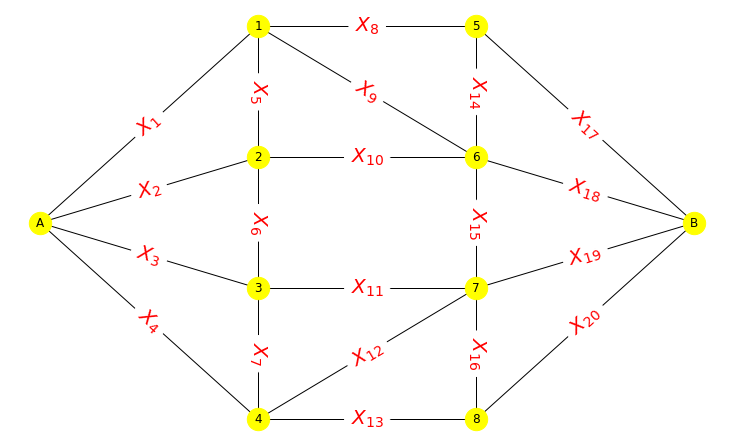

In [148]:
plt.figure(figsize=(10,6))

nx.draw(Gn, pos= pos,with_labels=True,node_size=500,node_color='yellow')

# labeling the edges
nx.draw_networkx_edge_labels(Gn,pos,edge_labels={('A','1'):'$X_1$', ('A', '2'):'$X_2$',('A', '3'):"$X_3$", ('A', '4'):"$X_4$",('1', '2'):"$X_5$", ('1', '5'):"$X_8$", ('1', '6'):"$X_9$", ('2', '6'):"$X_{10}$", ('2', '3'):"$X_{6}$", ('3', '7'):"$X_{11}$", ('3', '4'):"$X_{7}$", ('4', '7'):"$X_{12}$", ('4', '8'):"$X_{13}$", ('5', '6'):"$X_{14}$", ('5', 'B'):"$X_{17}$", ('6', '7'):"$X_{15}$", ('6', 'B'):"$X_{18}$", ('7', '8'):"$X_{16}$", ('7', 'B'):"$X_{19}$", ('8', 'B'):"$X_{20}$"} ,font_size=20,font_color='red')

# plt.savefig("Evaluation of network reliability.png")

#### 1.2 Find the minimal cut of the network

In [111]:
cut_value, partition = nx.minimum_cut(Gn,  "A", "B")
reachable, non_reachable = partition

cutset = set()
for u, nbrs in ((n, Gn[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(f"The minimal cut is",sorted(cutset),"the cut set is ",partition)

# cut_value == sum(Gn.edges[u, v]["capacity"] for (u, v) in cutset)

The minimal cut is [('5', 'B'), ('6', 'B'), ('7', 'B'), ('8', 'B')] the cut set is  ({'5', '7', '6', '2', '8', '4', 'A', '3', '1'}, {'B'})


#### So we find the minimal cut of this network, the edges are $X_{17}$ ~ $X_{20}$,which means if the four edges is not working as the same time, the network will fail, the signal will not be transmitted from A to B.Next we will calculted the failure probability.

#### 2.1 Generate the bernoulli random samples

In [112]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import bernoulli

In [125]:
# generate 20-dimension bernoulli verctor
np.random.seed(seed=540)

N=100000
p = 0.1
n=20

bernoulli_rvs=bernoulli.rvs(size=N * n,p=p)
data=np.reshape(np.mat(bernoulli_rvs),(N,n))

h_x =pd.DataFrame(data)
h_x.head() # samples generated from the bernouli distribution

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 2.2 calculate the failure probability of each edge using monte carlo integration 

In [114]:
p_edge_fail = h_x.sum() / N #monte carlo integration
p_edge_fail #the failure probability of each edge 

0     0.09762
1     0.09997
2     0.10044
3     0.09962
4     0.10102
5     0.10096
6     0.10074
7     0.10005
8     0.10146
9     0.09863
10    0.09842
11    0.10087
12    0.09944
13    0.10119
14    0.10010
15    0.10137
16    0.10104
17    0.10091
18    0.10086
19    0.10042
dtype: float64

The failure probability of edge $X_{17}$ ~ $X_{20}$:

In [136]:
p_17 = p_edge_fail[16]
p_18 = p_edge_fail[17]
p_19 = p_edge_fail[18]
p_20 = p_edge_fail[19]

In [141]:
P_relia_MCI = 1- p_17 * p_18 * p_19 * p_20

In [142]:
print(P_relia_MCI)

0.9998967317720849


we can see when the failure probability of each edge is small, the $h(\vec{x}) $  rarely reaches 1.So a large amount of simulations should be perfoemed to estimate the u with sufficient  precision. To be more accurate , we need the IS sampling, to improve the integral approximation: use importance samling approach.

Previously, we generate the bernouli random samples $\vec{x}=\left(x_{1}, x_{2} \ldots x_{20}\right)$. Now with the Importance samplling method, we need to generate bernouli random samples $\vec{x}_{1}^{*}, \vec{x}_{2}^{*}, \ldots, \vec{x}_{n}^{*}$ from $ g(\vec{x})=g\left(x_{1}, x_{2} \cdots, x_{20}\right)$ ,where $\left.x_{i} \text { ~Bernouli }\left(p^{*}\right) \text { where } p^{*}\right \rangle p$

$g(\vec{x})$ is the proposal function in the Importance samplling approach.

generate bernouli random samples $\vec{x}_{1}^{*}, \vec{x}_{2}^{*}, \ldots, \vec{x}_{n}^{*}$ 

In [126]:
np.random.seed(seed=42)

p_star = 0.2 #p_star should be greater than p
n=20

bernoulli_rvs_star=bernoulli.rvs(size=N * n,p=p_star)
data_star =np.reshape(np.mat(bernoulli_rvs_star),(N,n))

h_x_star =pd.DataFrame(data_star)
h_x_star.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [127]:
n_faill = h_x_star.T.sum()
n_faill.head()

0    4
1    3
2    5
3    4
4    2
dtype: int64

In [128]:
# x_17 = h_x_star[16]
# x_18 = h_x_star[17]
# x_19 = h_x_star[18]
# x_20 = h_x_star[19]
# h_x_star.loc[(x_17 == 1) & (x_18 ==1) & (x_19 ==1) & (x_20 == 1)].head()
# h_x_star.drop('name',axis=1)

In [129]:
net_faill= h_x_star[(x_17 == 1) & (x_18 ==1) & (x_19 ==1) & (x_20 == 1)]
net_faill.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
777,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1
1355,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,1
3060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
3124,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1
5011,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1


In [130]:
h_x_star.loc[(x_17 == 1) & (x_18 ==1) & (x_19 ==1) & (x_20 == 1),'hx'] = 1  #let the failure network label 1

In [131]:
h_x_star['hx'].fillna(0,inplace=True)

In [132]:
h_x_star_plus = h_x_star['hx']

In [133]:
w_star = p ** n_faill * (1-p)**(n-n_faill) /(p_star ** n_faill * (1-p_star) ** (n-n_faill))
pd.DataFrame(w_star)

,0
0,0.411453
1,0.925770
2,0.182868
3,0.411453
4,2.082981
...,...
99995,0.925770
99996,0.182868
99997,4.686708
99998,0.081275


In [143]:
P_relia_IS =  1 - sum(w_star * h_x_star_plus)/N

In [144]:
print(P_relia_IS)

0.9999024463239379


The result shows us the probablity of netwok failure could be very small(on the other hand ,the reliability is very high),that proves what profssor told us on the class the bit error rate for many types signal transmission can range from $ 10 ^{-10} $ to $10^{-3}$ or even lower.